# Multiple Myeloam Detection Using Deep Learning

---



Dataset Link: https://dataverse.harvard.edu/dataset.xhtml?persistentId=doi:10.7910/DVN/XCX7ST

In [ ]:
# Importing necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import keras
import tensorflow
from tensorflow.keras.utils import to_categorical
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
import random
%matplotlib inline

In [ ]:
# Mounting Google Drive to access the dataset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Loading cancer images
path = '/content/drive/My Drive/dataverse_files/MiMM_SBILab Dataset'
canc = []
l = os.listdir('/content/drive/My Drive/dataverse_files/MiMM_SBILab Dataset')
for i in range(40):
    img_arr = cv2.imread((os.path.join(path,l[i])),-1)
    new_arr = cv2.resize(img_arr,(512,512))
    canc.append([new_arr,1])
canc[35]

[array([[[182, 154, 158],
         [185, 162, 158],
         [186, 171, 166],
         ...,
         [157, 147, 153],
         [158, 141, 153],
         [151, 135, 145]],
 
        [[184, 154, 147],
         [180, 159, 163],
         [187, 171, 169],
         ...,
         [158, 148, 159],
         [157, 143, 146],
         [150, 134, 150]],
 
        [[182, 150, 150],
         [182, 162, 161],
         [185, 172, 174],
         ...,
         [159, 143, 155],
         [158, 141, 150],
         [151, 131, 140]],
 
        ...,
 
        [[150, 129, 164],
         [150, 126, 147],
         [147, 114, 138],
         ...,
         [179, 156, 171],
         [180, 160, 171],
         [182, 154, 176]],
 
        [[154, 124, 146],
         [145, 116, 140],
         [145, 109, 135],
         ...,
         [181, 158, 176],
         [181, 155, 179],
         [184, 158, 176]],
 
        [[148, 115, 136],
         [144, 112, 135],
         [146, 112, 145],
         ...,
         [180, 157, 177],
  

In [ ]:
# Loading non-cancer images
nc_path = '/content/drive/My Drive/noncancer'
non_canc = []
la = os.listdir('/content/drive/My Drive/noncancer')
for i in range(40):
    img_arr = cv2.imread((os.path.join(nc_path,la[i])),-1)
    new_arr = cv2.resize(img_arr,(512,512))
    non_canc.append([new_arr,0])
non_canc[15]

[array([[[164,  69,  51],
         [164,  69,  51],
         [164,  69,  51],
         ...,
         [201, 196, 197],
         [201, 196, 197],
         [201, 196, 197]],
 
        [[164,  69,  51],
         [164,  69,  51],
         [164,  69,  51],
         ...,
         [201, 196, 197],
         [201, 196, 197],
         [201, 196, 197]],
 
        [[164,  69,  51],
         [164,  69,  51],
         [164,  69,  51],
         ...,
         [201, 196, 197],
         [201, 196, 197],
         [201, 196, 197]],
 
        ...,
 
        [[210, 211, 211],
         [210, 211, 211],
         [210, 211, 211],
         ...,
         [206, 211, 210],
         [206, 211, 210],
         [206, 211, 210]],
 
        [[210, 211, 211],
         [210, 211, 211],
         [210, 211, 211],
         ...,
         [206, 211, 210],
         [206, 211, 210],
         [206, 211, 210]],
 
        [[210, 211, 211],
         [210, 211, 211],
         [210, 211, 211],
         ...,
         [206, 211, 210],
  

In [ ]:
# Combining cancer and non-cancer images and shuffling the dataset
l = canc + non_canc
random.shuffle(l)

In [ ]:
# Checking the length of the combined dataset
len(l)

80

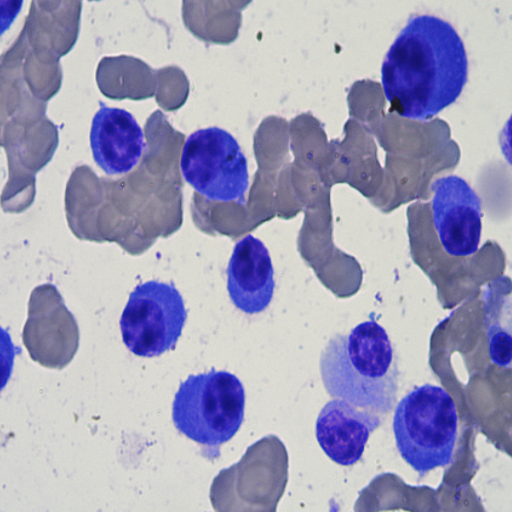

In [ ]:
# Displaying a sample image from the combined dataset
from google.colab.patches import cv2_imshow
cv2_imshow(l[0][0])

In [ ]:
# Preparing data for training
x = []
y = []
for img,label in l:
    x.append(img)
    y.append(label)

In [ ]:
x = np.array(x)

In [ ]:
len(x)

80

In [ ]:
len(y)

80

In [ ]:
# Converting labels to one-hot encoding
import tensorflow
y = tensorflow.keras.utils.to_categorical(y,num_classes=2)

In [ ]:
# Dispalying a sample of the labels
y[:10]

array([[1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.]], dtype=float32)

In [ ]:
# Applying CLAHE (Contrast Limited Adaptive Histogram Equalization) to enhance image contrast
clahe = cv2.createCLAHE(clipLimit=1.0, tileGridSize=(8,8))
for i in x:
  i[:,:,0] = clahe.apply(i[:,:,0])
  i[:,:,1] = clahe.apply(i[:,:,1])
  i[:,:,2] = clahe.apply(i[:,:,2])

In [ ]:
# Defining function to create image masks
def mask(img):
  hsv_img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
  pink_lower = np.array([100, 100, 30])
  pink_upper = np.array([255, 250, 250])
  mask = cv2.inRange(hsv_img, pink_lower, pink_upper)
  return(mask)

In [ ]:
# Defining function to segment images
def seg(img):
  yield (cv2.bitwise_or(img, img, mask = mask(img)))

In [ ]:
# Segmenting the images
seg_list = []
for i in x:
  q = list(seg(i))
  seg_list.append(q[0])

In [ ]:
seg_list = np.array(seg_list)
seg_list = np.reshape((56,512,512,3))
seg_list.shape

(80, 512, 512, 3)

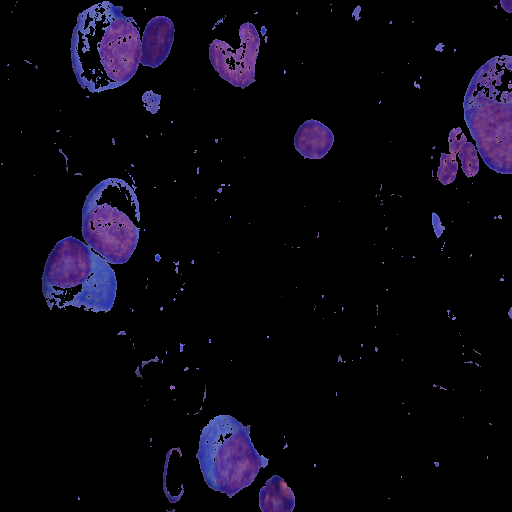

In [ ]:
# Displaying a segmented image
cv2_imshow(seg_list[1])

In [ ]:
# Splitting the data into training and testing sets
x_train,x_test,y_train,y_test = train_test_split(seg_list,y,test_size = 0.30,random_state = 1)

In [ ]:
len(x_train)

56

In [ ]:
len(y_test)

24

In [ ]:
x_train.shape

(56, 512, 512, 3)

In [ ]:
x_test.shape

(24, 512, 512, 3)

We have done all the ncecessary data preprocessing on the images and now we can use the training and testing sets to build a deep learning model for Multiple Myeloma Detection.